**Задача**

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

## Открываем файл с данными и изучаем общую информацию. 

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from scipy import stats as st

In [101]:
data = pd.read_csv('/datasets/games.csv')

**Выводим первые 20 строчек датафрейма `data` на экран.**

In [102]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведим основную информацию о датафрейме с помощью метода info().**

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных
**Приведем названия столбцов к написанию в нижнем регистре**

In [104]:
# переименование столбцов
#data=data.rename(columns={'Name':'name', 'Platform':'platform','Year_of_Release':'year_of_release', 
#                          'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales',
#                          'Other_sales':'other_sales','Critic_Score':'critic_score', 'User_Score':'user_score',
#                          'Rating':'rating'})

In [105]:
data.columns = data.columns.str.lower()

**Проверяем пропуски в данных.**

In [106]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Две игры без названия** - нельзя говорить об объекте, не име его основного идентификатора, кроме того объекты очень старые и данные 30-летней давности никак не соотносятся с данными игр 2010-х годов. Смело можно удалить.
Вместе с этим пропадают пропуски и в столбце "Жанр"

In [107]:
display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [108]:
data = data.dropna (subset=['name']) # Удаляю строки без названия игры

**Платворма DS** В исследовательской части проекта появились данные для платформы DS за 1985 год. Проверю их:

In [109]:
display(data.loc[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


В данном случае аномалию можно исправить. Игра вышла в 2010 году.

In [110]:
data.loc[data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010

**Год издания** 

Т.к. некоторые задачи проекта связаны с годом выпуска игр, а пропуски в этом столбце заменить больше нечем, то данные строки можно удалить из дата-сета. 260/16715 = 1.6% - столько данных потеряем максимально без учета пункта 1, это вполне приемлемо.
Тип данных меняем на целочисленные.

In [111]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)
data = data.loc[data['year_of_release'] != 0]

**Оценки и рейтинги.**

Примеры вывода частей датасета с пропусками по оценкам и данные по пропускам по каждой колонке говорят, что если нет данных по user_score, то и остальные оценки и рейтинги для данной игры не имеют значений. Удалить их нельзя -слишком большой объем данных. 

In [112]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Оценки критиков выглядят хорошо, тип данных - Float. Ничего не меняю.

Пропуски в **рейтингах** заменим на "unknown"

In [113]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [114]:
data['rating'] = data['rating'].fillna('unknown')

Проверяю столбец user_score

In [115]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценка пользователя "tbd" - "to be defined" приравнивается к пропуску. Заменим на соответствующее обозначение и преобразуем данные во float.

In [116]:
data.loc[data['user_score'] == 'tbd','user_score'] =  np.NaN
data['user_score'] = data['user_score'].astype(float)

Проверим результаты всех операций.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [118]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Все выглядит хорошо.

**Посчитаем продажи во всех регионах**

In [119]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [120]:
data.duplicated().sum()

0

## Исследовательский анализ данных

Проанализируем год издания

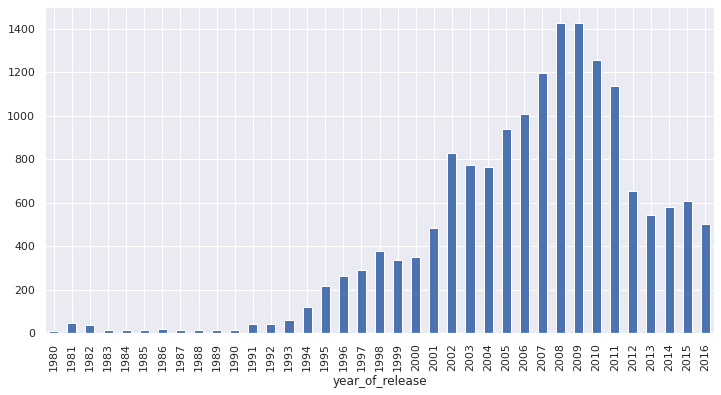

In [121]:
# Сколько игр выпускалось в разные годы
qty_year = data.groupby('year_of_release')['platform'].count()
qty_year.plot(kind = 'bar', grid = True, figsize=(12, 6));

Мир игр меняется вместе с "железом", которое меняется довольно быстро. Поэтому учитывать старые данные смысла не имеет. Судя по данным продаж остановиться стоит на периоде с 2012 года, после которого объемы продаж были довольно близкиими друг к другу.

**Анализ платформ**

Проанализируем продажи по всем платформам за все время.

Определим лидирующие платформы

In [122]:
platforms = data.groupby('platform')['total_sales'].sum()

# Заведем ТОП-10 в отдельную переменную
top_platforms = platforms.sort_values(ascending=False).head(10) 
platforms = platforms.sort_values(ascending=False).head(15)


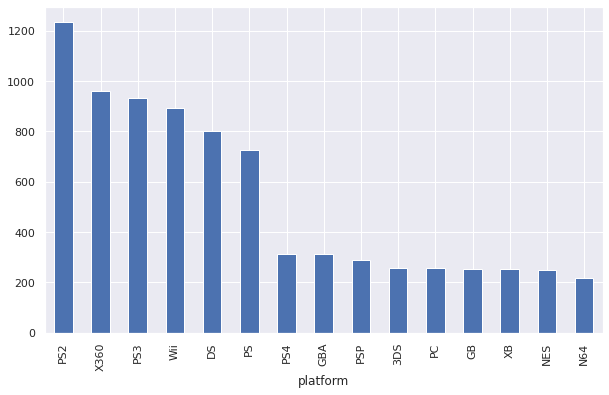

In [123]:
platforms.plot(kind = 'bar', grid = True, style = 'o', figsize=(10, 6));

In [124]:
# Сделаю срез по топ-10 консолям
data['top'] = False # маркер для ТОП платформ

for console in top_platforms.index:
    data.loc[data['platform'] == console, 'top'] = True
# Выведем распределение продаж ТОП-10 платформ по годам

data_top= data.query('top == True')
sales_years = data_top.pivot_table(index = 'year_of_release',
                                   columns = 'platform', values = 'total_sales', aggfunc = 'sum')

Строю распределение продаж по ТОР-10 платформам по годам.

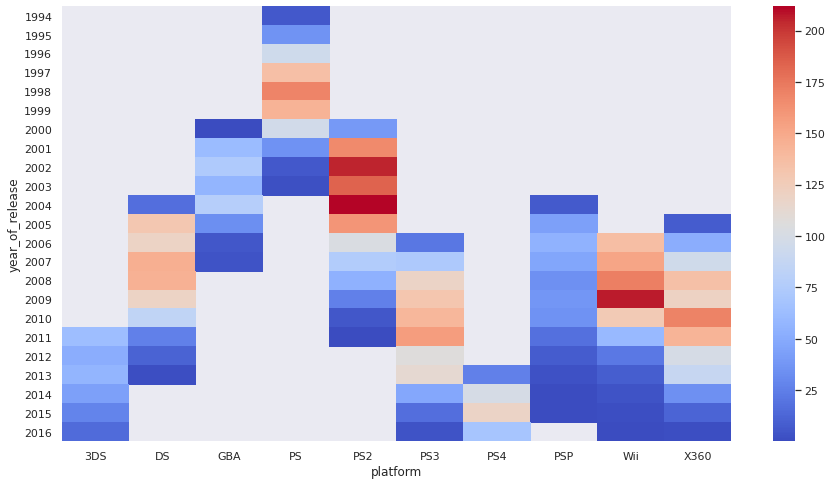

In [125]:
plt.figure(figsize = (15,8))
sns.heatmap(sales_years, cmap="coolwarm");

При первмо запуске была выявлена аномалия с платформой DS - появились данные за 1985г, хотя платформа живет с 2004 года.
Вернулся в начальный этап проекта и удалил эту аномалию.

По тепловой карте самых популярных платформ видно, что платформа живет около **10 лет**, хорошие продажи идут в среднем в течение **4** лет, после чего происходит смена поколений.

TOP-10 можно сократить до ТОР-6. Об этом говорят два последних графика.

Учитывая срок полной жизни платформы около 10 лет, можно сделать вывод, что 3 из 4 платформ, данные о которых есть в 2016 году полностью уйдут с рынка в 16-17 годах. И останутся PS4, смена для Х360 и портативной платформы.

Прогноз на 2017 стоит делать, обращая внимание на данные последних 4 лет - они близки друг к другу и отражают близкий друг к другу технологический уровень индустрии. Проведу аналогичные исслодования для актуального дата-сета с данными не старше 2012 года.

In [126]:
# Выделяем ТОП-6 платформ  и распределение продаж по годам (аналогично ТОП-10)
top6_platforms = platforms.sort_values(ascending=False).head(6)
# Делаем срез общего дата-сета по ТОП-6
data['top'] = False
for console in top6_platforms.index:
    data.loc[data['platform'] == console, 'top'] = True
data_top6= data.query('top == True')
# Сводная таблица по ТОП-6 за все время.
# sales_years6 = data_top6.pivot_table(index = 'platform',
#                                     values = 'total_sales', aggfunc = 'sum')

Построим ящик с усами для самых продаваемых платформ.

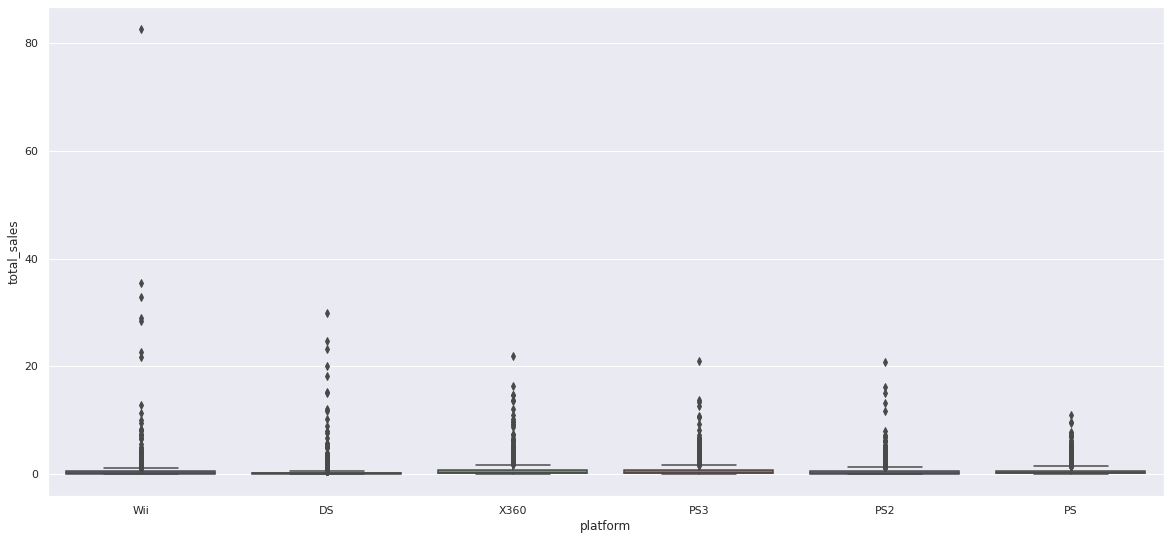

In [127]:
sns.boxplot(data = data_top6, y = 'total_sales', x='platform')
sns.set(rc={'figure.figsize':(20,9)})
plt.show()

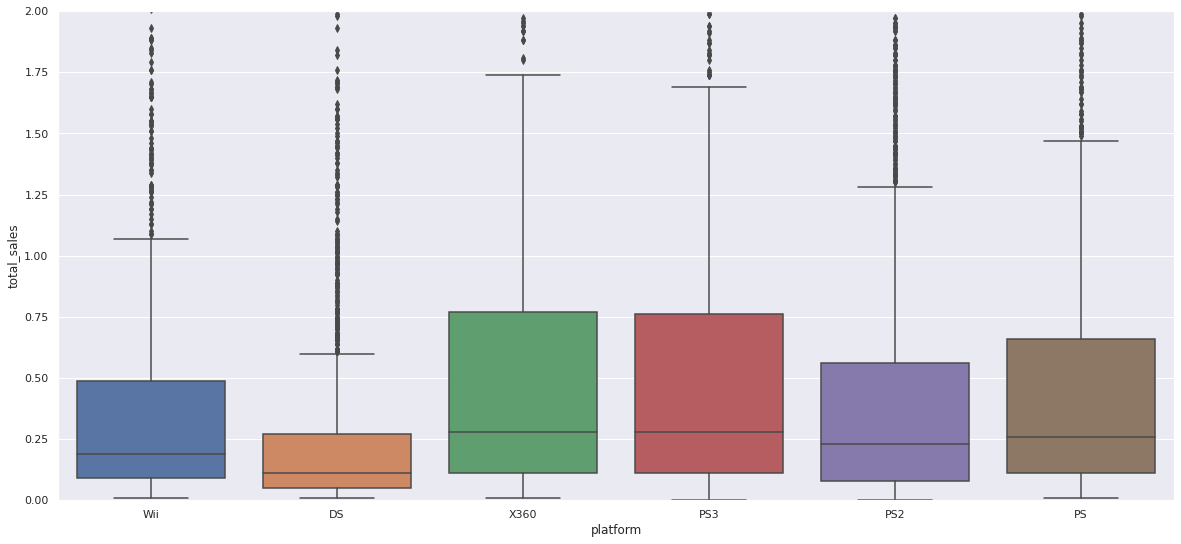

In [128]:
sns.boxplot(data = data_top6, y = 'total_sales', x='platform')
sns.set(rc={'figure.figsize':(20,9)})
plt.ylim(0, 2)
plt.show()

УДАЛИТЬ Данных по продажам по каждой платформе не много, и все они попадают в границы нормального распределения. 

Сделаю срез для продаж с 2012 года.

In [129]:
data_2012 = data.query('year_of_release > 2011')

In [130]:
data_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
 12  top              2886 non-null   bool   
dtypes: bool(1), float64(7), int64(1), object(4)
memory usage: 295.9+ KB


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

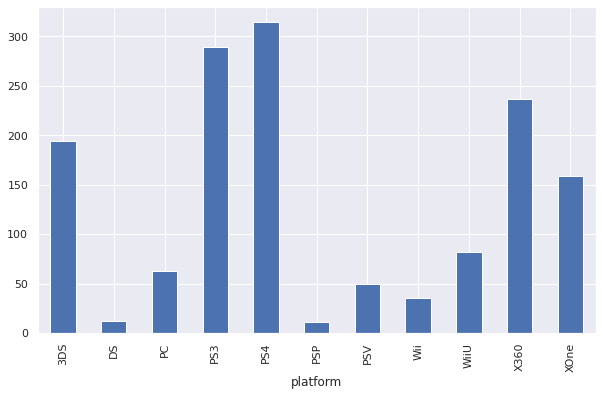

In [131]:
# Определяем лидирующие платформы
platforms2012 = data_2012.groupby('platform')['total_sales'].sum()
platforms2012.plot(kind = 'bar', y = 'Продажи', grid = True, style = 'o', figsize=(10, 6));

# Выведем данные по продажам всех платформ с 2012 года
platforms2012.sort_values(ascending=False)

Проверим распределение продаж по платформам начиная с 2012 года.

In [132]:
sales_years2012 = data_2012.pivot_table(index = 'year_of_release', columns = 'platform',
                                        values = 'total_sales', aggfunc = 'sum')

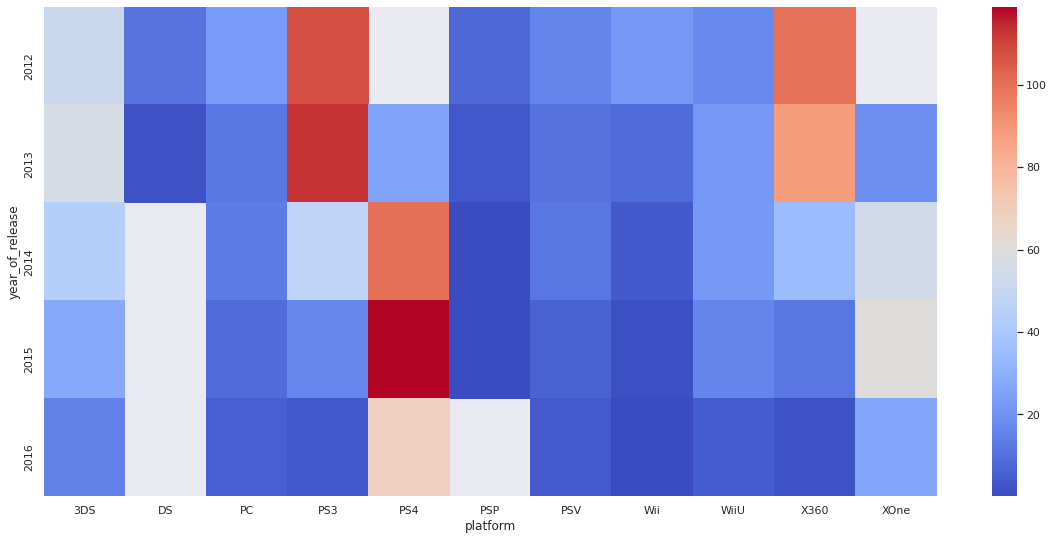

In [133]:
seaborn.heatmap(sales_years2012, cmap="coolwarm");

Выводы по актуальному дата-сету.
1. Т.к. Общий дата-сет был создан в 2016 году, то он не обладает полнотой информации на 2016 год, поэтому данные о продажах явно немного занижены по отношению к реальным, что не дает нам увидеть четкий тренд в продажах. Но из предыдущего исследования есть понимание о времени жизни платформы и времени активных продаж. На основе этого делаю дальнейшие выводы.
2. Игры для PS4 будут продаваться очень хорошо. Это будет 5-ый год продаж и 4-ий год хороших продаж. Все еще впереди
3. Xbox-One - конкурент PS - так же будет продаваться 5-ый год, продажи должны быть явно выше предыдущих лет. Предшественник Х360 должен полностью уступить дорогу актуальной приставке.
4. Игры для Персональных компьютеров имеют стабильный спрос - без особых взлетов и падений. "Гарантированные продажи"
5. Портативные платформы. WIIU и 3DS последний раз обновлялись в 2012 году, поэтому продажи снижаются. После анонса в конце 2016 года Nintendo Switch продажи игр для старых портативок будут снижаться, а вот к выходу новой  консоли стоит подготовиться.

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Рассмотрим самую пополярную на актулаьном временном отрезке платформу PS4.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между оценками критиков и продажами для платформы PS4 : 0.40656790206178095


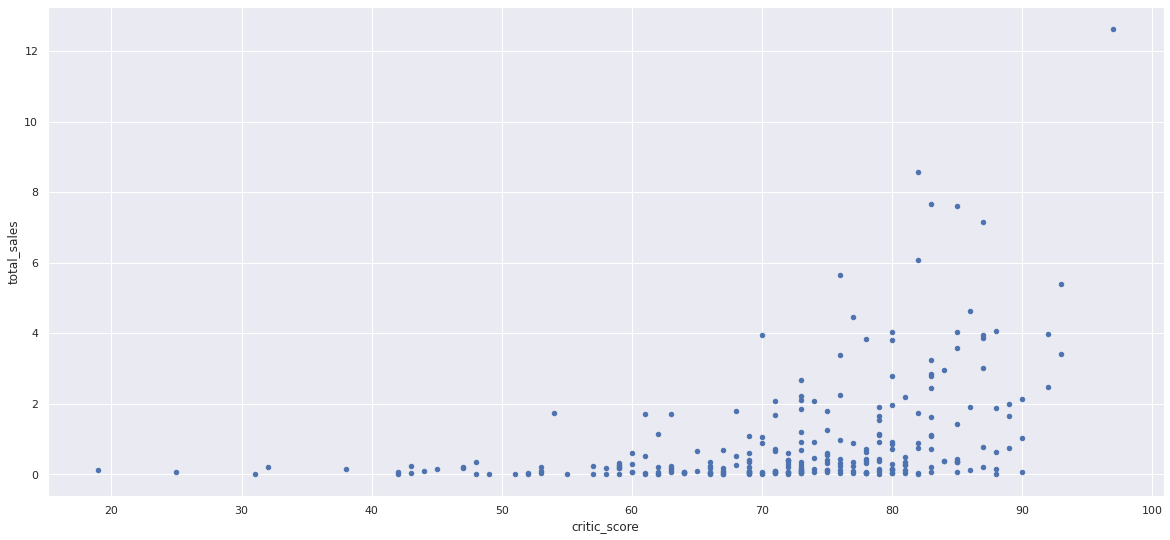

In [134]:
data_PS4 = data_2012.query('platform == "PS4"')
data_PS4.plot(x='critic_score', y='total_sales', kind='scatter');
print('Коэффициент корреляции между оценками критиков и продажами для платформы PS4 :',
      data_PS4['critic_score'].corr(data_PS4['total_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между оценками пользователей и продажами для платформы PS4 : -0.031957110204556376


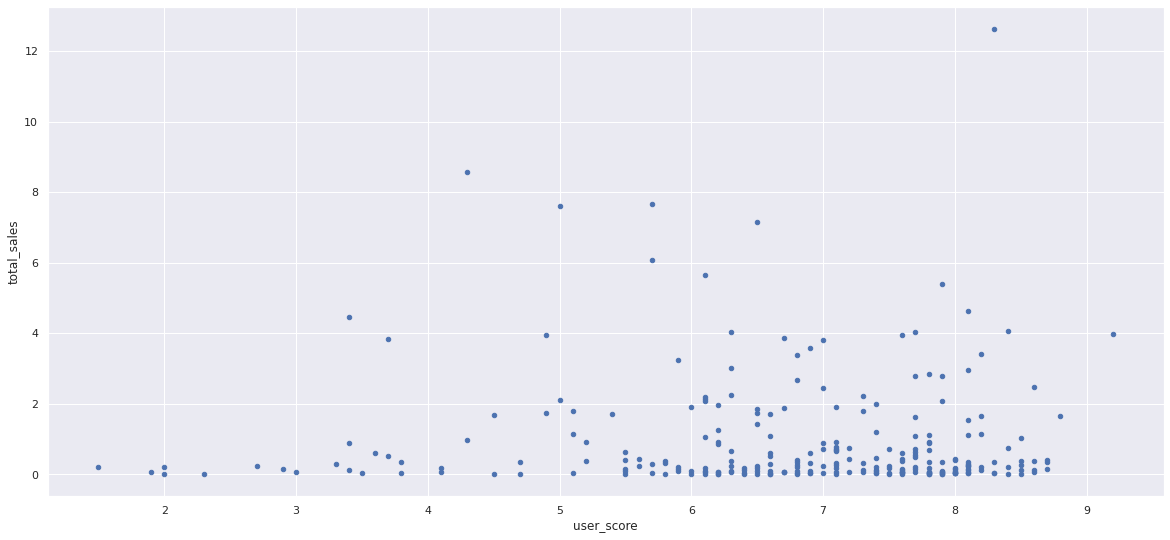

In [135]:
data_PS4.plot(x='user_score', y='total_sales', kind='scatter');
print('Коэффициент корреляции между оценками пользователей и продажами для платформы PS4 :',
      data_PS4['user_score'].corr(data_PS4['total_sales']))

Коэффициент корреляции 0,4 говорит о средней прямой связи между оценками критиков и продажами. Их работа вносит определенный вклад.
Оценки пользователей вообще не влияют на продажи - коэффициент обратый: -0,03.
Одна из причин такого результата - критики оценивают игру на старте продаж, а  пользователи уже **купили** игру. 
Критик в какой-то мере является рекламным инструментом, а у пользователя есть ожидания и реальность, и они не всегда сходятся.

Проверю корреляцию между оценкаим критиков и пользователей - она средняя - 0,52. Обе группы оценивают в одном направлении, но пользователей больше, чем критиков, поэтому разбег оценок велик относительно оценки критков.

На **других платформах** ситуация по моему должна быть похожей, т.к. многие игры представлены на нескольких платформах. Разработка, выпуск, реклама, распространение идут примерно одинаково. Конфета та же, обертка другая.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.5177272095232911


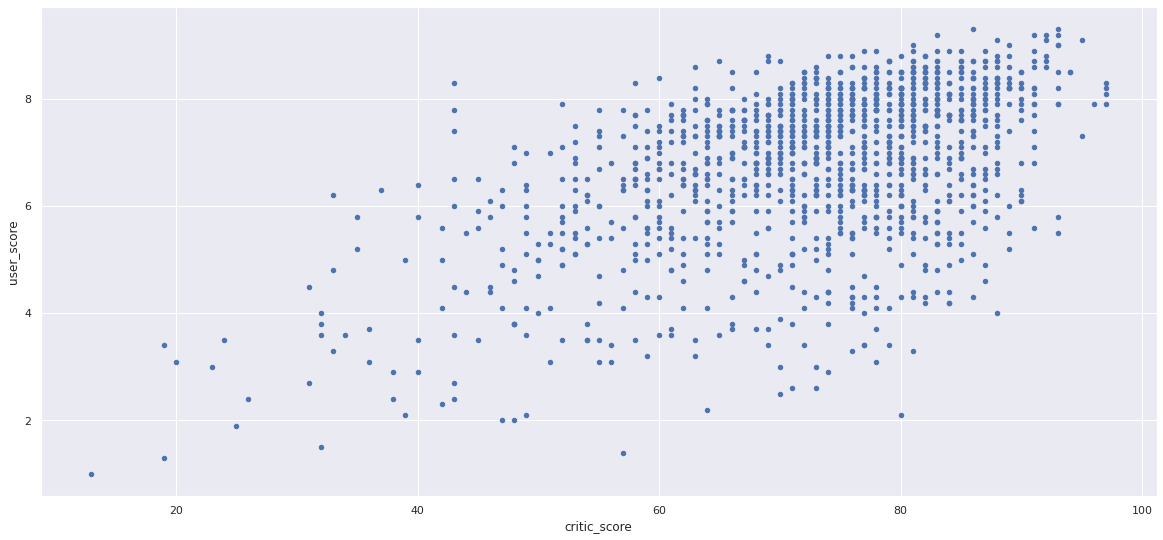

In [136]:
print(data_2012['user_score'].corr(data_2012['critic_score']))
data_2012.plot(x='critic_score', y='user_score', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между оценками критиков и продажами для платформы Х360 : 0.3605734888507336


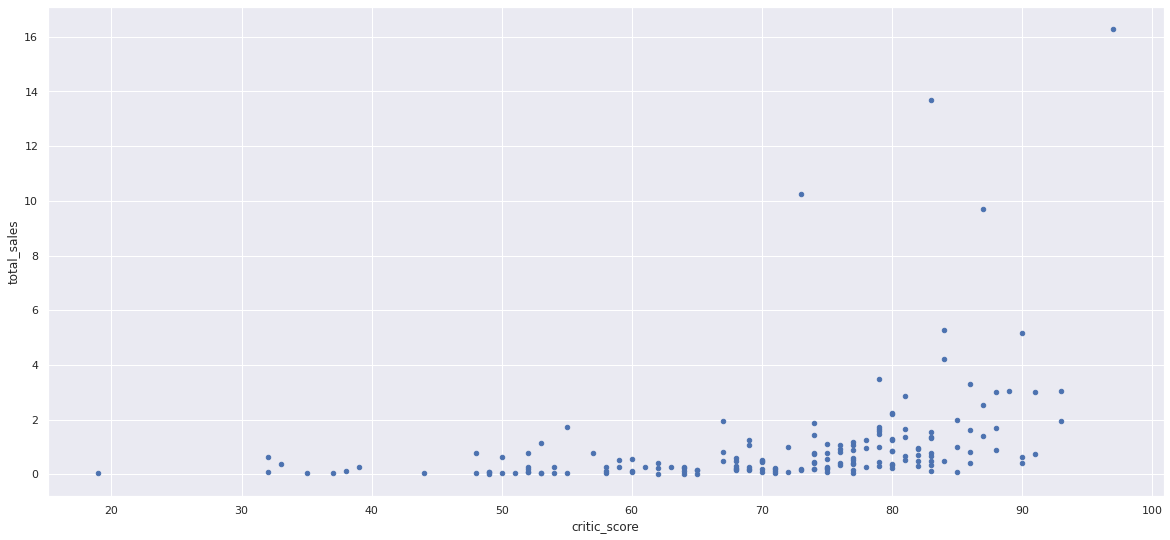

In [137]:
data_X360 = data_2012.query('platform == "X360"')
data_X360.plot(x='critic_score', y='total_sales', kind='scatter');
print('Коэффициент корреляции между оценками критиков и продажами для платформы Х360 :',
      data_X360['critic_score'].corr(data_X360['total_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции между оценками пользователей и продажами для платформы X360 : 0.006163978646213326


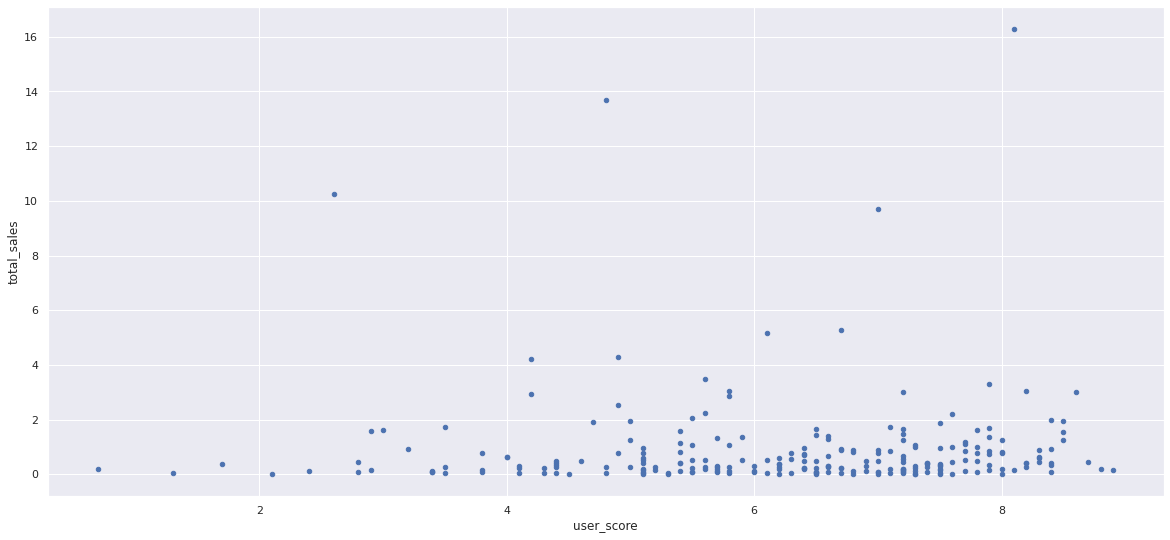

In [138]:
data_X360.plot(x='user_score', y='total_sales', kind='scatter');
print('Коэффициент корреляции между оценками пользователей и продажами для платформы X360 :',
      data_X360['user_score'].corr(data_X360['total_sales']))

Рассмотрим общее распределение игр по жанрам. 

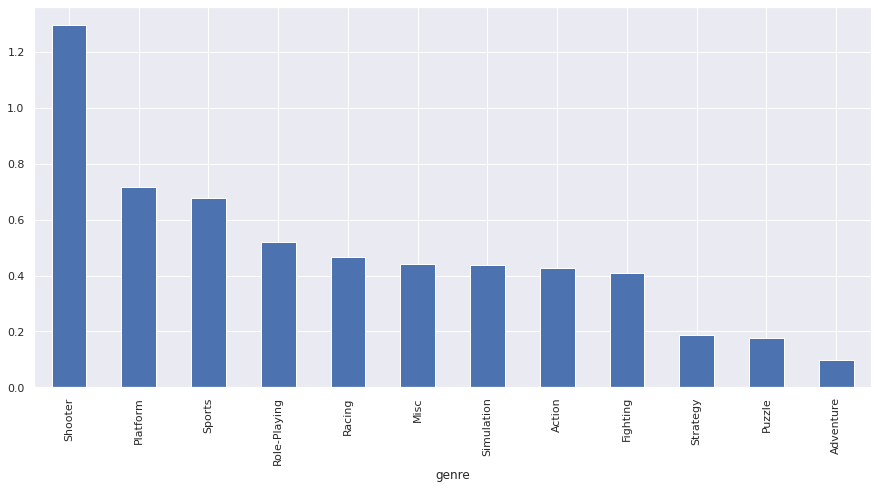

In [139]:
genres = data_2012.groupby('genre')['total_sales'].mean()
genres = genres.sort_values(ascending=False)
genres.plot(kind='bar',figsize=(15, 7));

По игровым жанрам есть явная группа лидеров - Action, Shooter, RPG и Sports c общей долей 77%. Остальные жанры имеют кратное отставание даже от 3-4 места.

Если посмотреть список с конца, то увидим следующие жанры:

    - Puzzles. Головоломки интересны многим. Но в большинстве случаев они менее ресурсоемкие при создании, а , значит, более дешевые.
    
    - Стратегии. Тут скорее нет качественных игр. Со времен Civilization, HMM и Age of Empires хитов больше не выпускалось.
    
    - Advanture. GTA уже собрала сливки до 2012 года, так что без хитов этот жанр не выбьется в лидеры

    - Симуляторы. Нишевый жанр для фанатов определенного вида техники. 

График никаких сюрпризов не показал.

In [140]:
display(genres.head(4))

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Name: total_sales, dtype: float64

## Портрет пользователя в Европе, С.Америке и Японии
Составьте портрет пользователя каждого региона Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

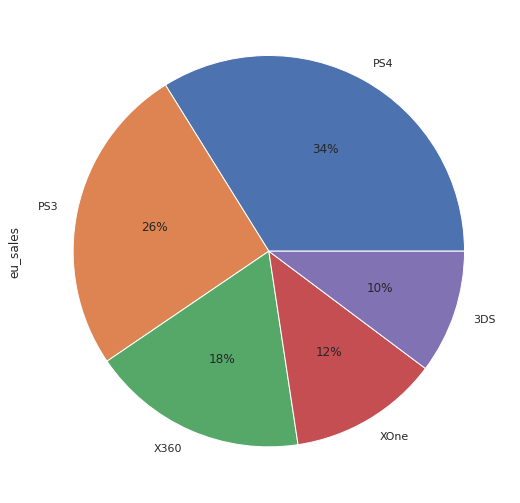

In [141]:
platforms_eu = data_2012.groupby('platform')['eu_sales'].sum()
platforms_eu = platforms_eu.sort_values(ascending=False).head(5)
platforms_eu.plot(kind = 'pie', autopct='%1.0f%%');

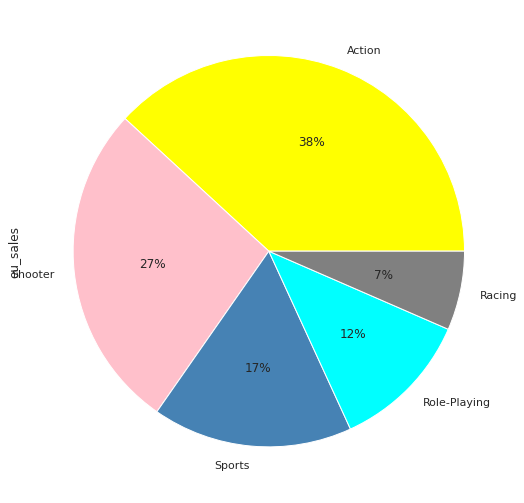

In [142]:
genre_eu = data_2012.groupby('genre')['eu_sales'].sum()
genre_eu = genre_eu.sort_values(ascending=False).head(5)
genre_eu.plot(kind = 'pie', autopct='%1.0f%%',
              colors = ['yellow', 'pink', 'steelblue', 'cyan', 'gray'], normalize=True);

В европе пользователи предпочитают большие консоли, причем на долю семейства Sony PlayStaytion приходится около 60% рынка ТОП-5. Возможно, это связано с тем, что Playstation является давним спонсором футбольной Лиги Чемпионов.
Семейство Xbox имеет долю рынка в 2 раза меньше, чем Sony.
Портативная платформа берет на себя 10-ю часть рынка.

Распределение по жанрам включает в себя основную 4-ку из общего распределения +  Автогонки.


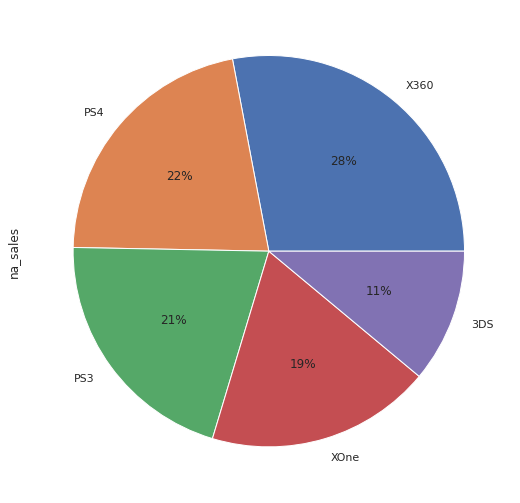

In [143]:
platforms_na = data_2012.groupby('platform')['na_sales'].sum()
platforms_na = platforms_na.sort_values(ascending=False).head(5)
platforms_na.plot(kind = 'pie', autopct='%1.0f%%');

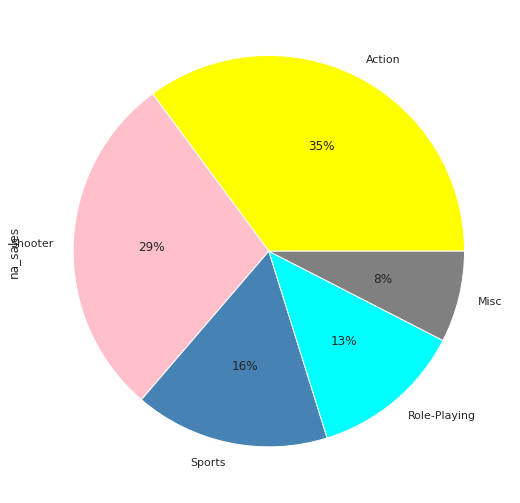

In [144]:
genre_na = data_2012.groupby('genre')['na_sales'].sum()
genre_na = genre_na.sort_values(ascending=False).head(5)
genre_na.plot(kind = 'pie', autopct='%1.0f%%',
              colors = ['yellow', 'pink', 'steelblue', 'cyan', 'gray'], normalize=True);

На североамериканском рынке доля платформ от Microsoft ожидаемо выше, чем в Европе - почти половина (47%). Сказывается "отечественный" производитель.
Поэтому доля PlayStation ниже, но тоже ощутимая - 43 %
Портативная консоль Nintendo 3DS имеет те же 10% рынка

Жанровое распределение практически повторяет Европу по составу и долям, за исключением 5-го места, которое заняли игры прочих жанров.

Вывод - рынки Европы и Северной Америки в целом похожи по распределениям платформ и жанров. Распределение между большими консолями и поративными - 90/10.



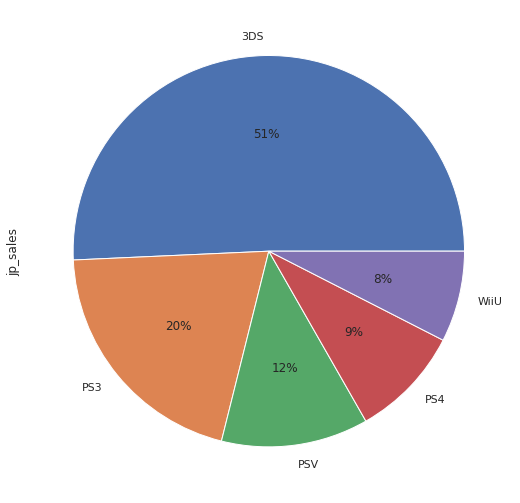

In [145]:
# Японский рынок
platforms_jp = data_2012.groupby('platform')['jp_sales'].sum()
platforms_jp = platforms_jp.sort_values(ascending=False).head(5)
platforms_jp.plot(kind = 'pie', autopct='%1.0f%%');

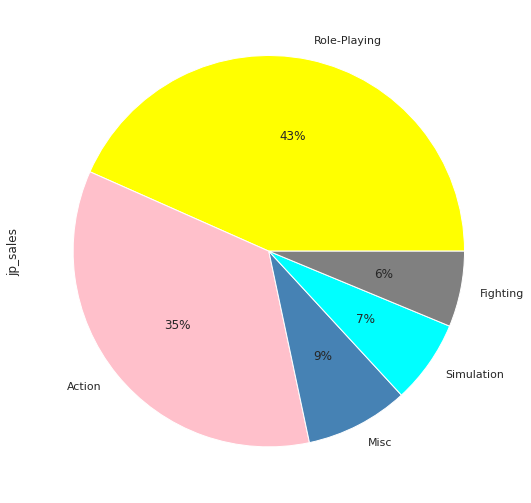

In [146]:
genre_jp = data_2012.groupby('genre')['jp_sales'].sum()
genre_jp = genre_jp.sort_values(ascending=False).head(5)
genre_jp.plot(kind = 'pie', autopct='%1.0f%%',
              colors = ['yellow', 'pink', 'steelblue', 'cyan', 'gray'], normalize=True);

На японсоком рынке лидеры только японские, что вполне логично. 
Но рынок выглядит совсем иначе. На большие консоли приходится лишь 29% рынка, все остальное - игры для портативных устройств.
Совершенно другой мир!

В японии, как и во всем мире чуть больше трети игр продаются в жанре Экшн, но это не самый популярный жанр, как в Европе и Америке. Привязанность к портативнм платформам вывела игры Файтинг на 5-е место. А ТОР-4 жанр в мире RPG оказался в Японии самым популярным.
Еще раз - совершенно другой мир!

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [147]:
regions=['eu_sales', 'na_sales', 'jp_sales']

In [148]:
print(data_2012.groupby('rating')[regions].mean())

         eu_sales  na_sales  jp_sales
rating                               
E        0.286152  0.289544  0.071722
E10+     0.180948  0.247386  0.026765
M        0.389478  0.465000  0.042570
T        0.128544  0.160243  0.063155
unknown  0.071765  0.081027  0.085365


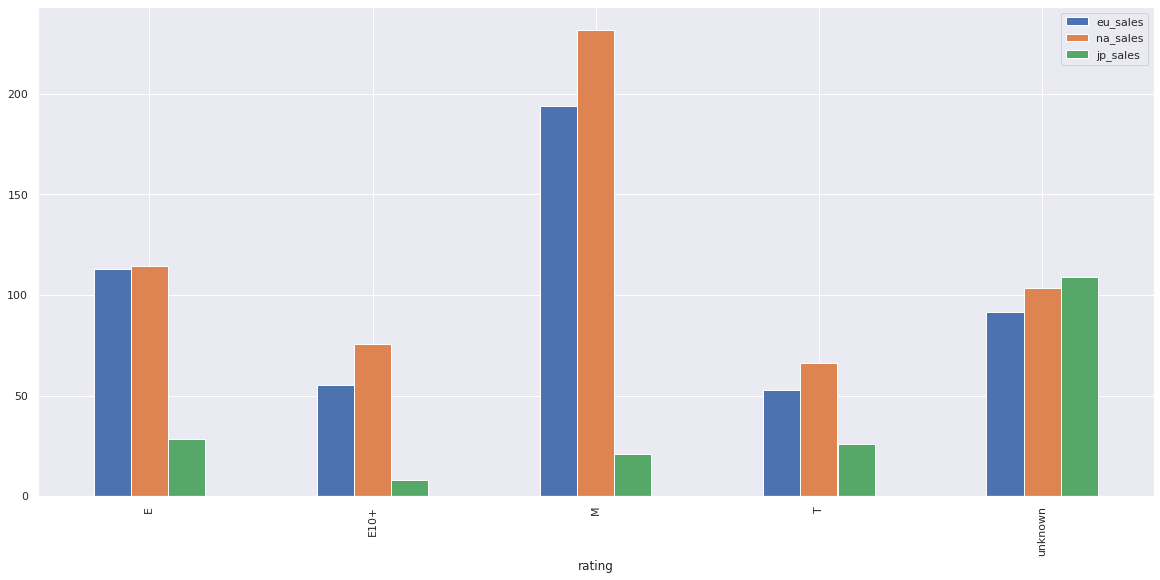

In [149]:
data_2012.groupby('rating')[regions].sum().plot(kind = 'bar');

Судя по полученным данным, в Японии не любят ESRB-маркировку. В тоже время в Японии есть своя система маркировки видеоигр.
Вполне вероятно, что пропуски во рейтингах многих игр были связаны именно с этим. Там, где есть оценка, видны аномально низкие продажи по сравнению с Европой и Америкой, но, там, где нет оценки - Япония даже впереди.

Корректно было бы анализировать рейтинг, работающий во всех странах или учитывающий разные рейтинги в одном.

## Проверьте гипотезы

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.



Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One = рейтингам (user_score) платформ PC`
H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One ≠ рейтингам (user_score) платформ PC

In [150]:
data1 = data.query('user_score > 0') #Выделяем дата-сет без пропусков в пользовательских оценках.
rating_xone = data1.loc[data1['platform'] =='XOne','user_score']
rating_pc = data1.loc[data1['platform'] =='PC','user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(rating_xone, rating_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Средние пользовательские рейтинги (user_score) жанра Action  = рейтингам (user_score) жанра Sports

H_a: Средние пользовательские рейтинги (user_score) жанра Action  ≠ рейтингам (user_score) жанра Sports

In [151]:
rating_action = data1.loc[data1['genre'] =='Action','user_score']
rating_sports = data1.loc[data1['genre'] =='Sports','user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(rating_action, rating_sports,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


In [152]:

data2 = data_2012.query('user_score > 0') #Выделяем дата-сет без пропусков в пользовательских оценках.
rating_xone = data2.loc[data2['platform'] =='XOne','user_score']
rating_pc = data2.loc[data2['platform'] =='PC','user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(rating_xone, rating_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [153]:
rating_action = data2.loc[data2['genre'] =='Action','user_score']
rating_sports = data2.loc[data2['genre'] =='Sports','user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(rating_action, rating_sports,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


## Общий вывод

**Задача**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Для планирования действия на 2017 год потребуются только сежие данные. График суммарных продаж по годам подсказал, что брать данные старше 2012 года не стоит.
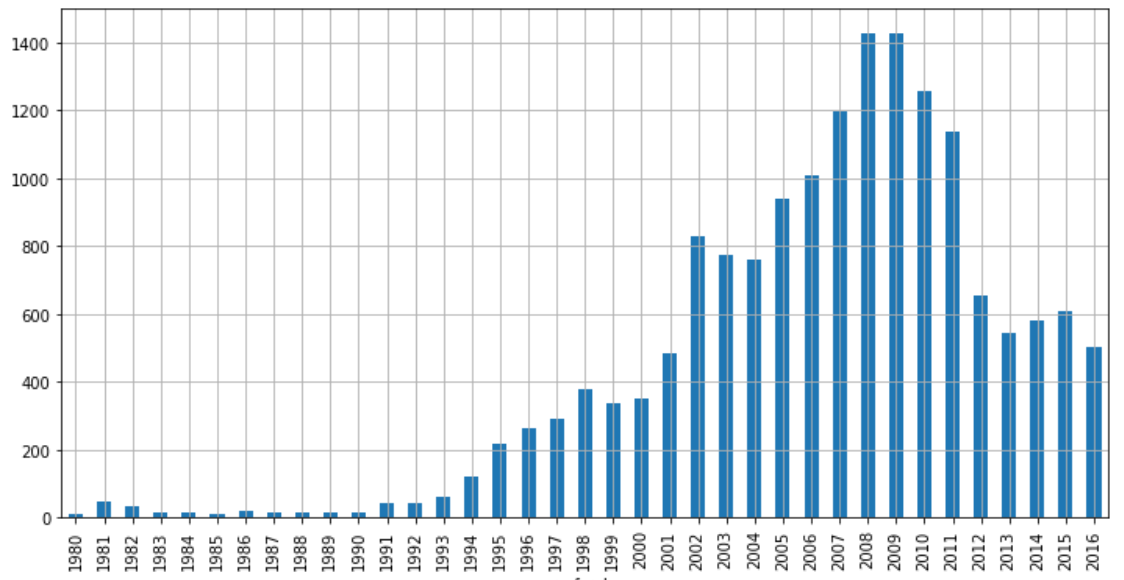

Исследование продаж по платформам позволило определтить лидирующие платформы за все время, а так же среднее время жизни платформы и средний срок успешных продаж.
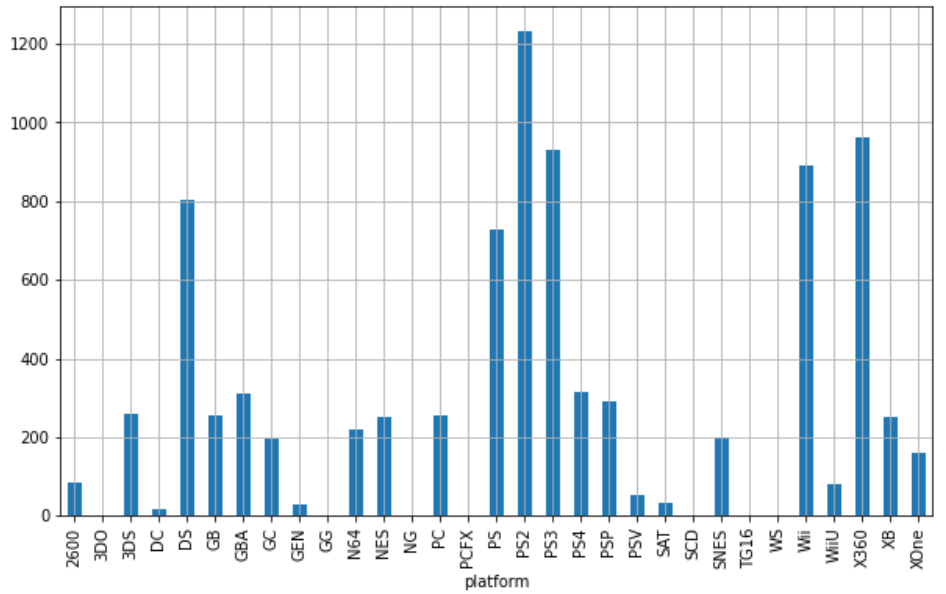

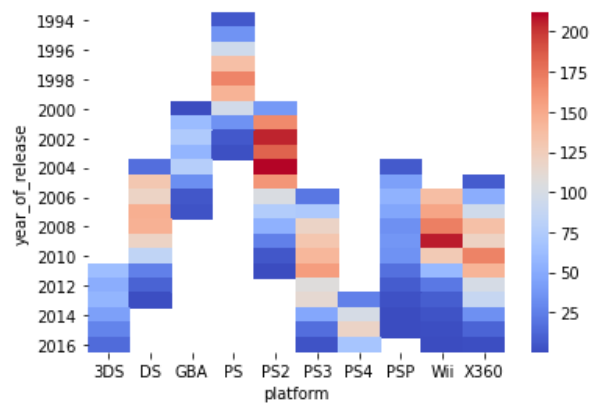

Платформа живет около 10-11 лет, 4-5 лет из которых дают максимальные продажи, после чего необходимо обновление платформы и выпуск новых игр, которые смогут использовать новые технологические возможности.


**Оценка перспектив на 2017 год.**

Проведя исследование данных, начиная с 2012 года и учитывая исследование полного дата-сета, были сделаны следующие выводы:
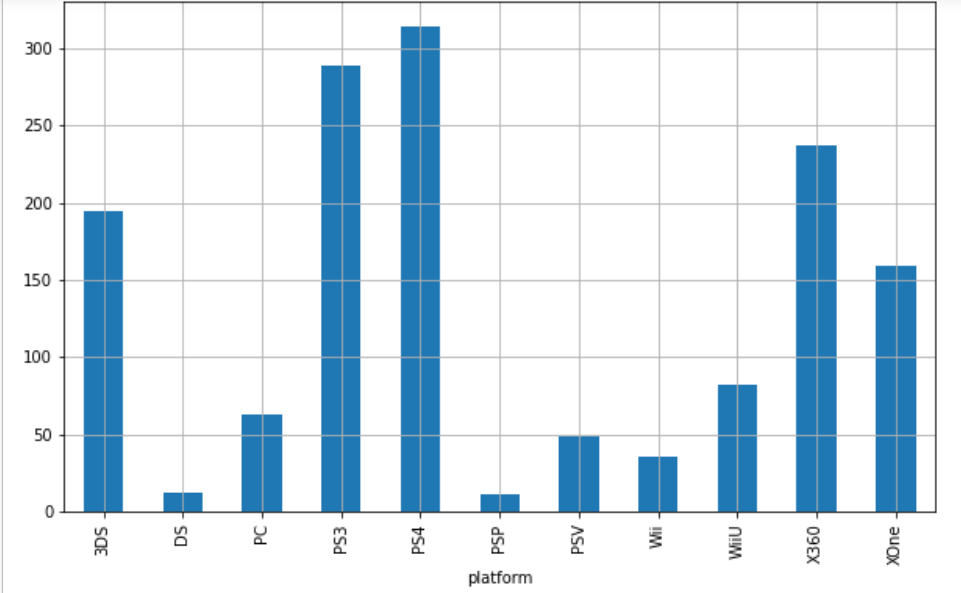

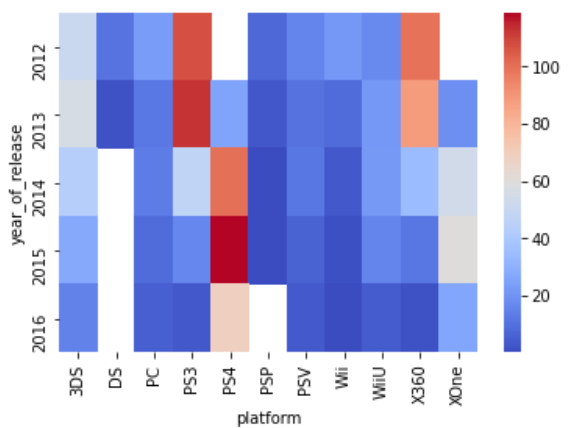

1. Т.к. Общий дата-сет был создан в 2016 году, то он не обладает полнотой информации на 2016 год, поэтому данные о продажах явно немного занижены по отношению к реальным, что не дает нам увидеть четкий тренд в продажах. Но из предыдущего исследования есть понимание о времени жизни платформы и времени активных продаж. На основе этого делаю дальнейшие выводы.
2. Игры для PS4 будут продаваться очень хорошо. Это будет 5-ый год продаж и 4-ий год хороших продаж. Все еще впереди
3. Xbox-One - конкурент PS - так же будет продаваться 5-ый год, продажи должны быть явно выше предыдущих лет. Предшественник Х360 должен полностью уступить дорогу актуальной приставке.
4. Игры для Персональных компьютеров имеют стабильный спрос - без особых взлетов и падений. "Гарантированные продажи"
5. Портативные платформы. WIIU и 3DS последний раз обновлялись в 2012 году, поэтому продажи снижаются. После анонса в конце 2016 года Nintendo Switch продажи игр для старых портативок будут снижаться, а вот к выходу новой  консоли стоит подготовиться.


**Об оценках критиков и пользователей**
На примере самой популярной за полсдение годы платформы PS4 было проанализировано влияние крикиков и пользователей на продажи.

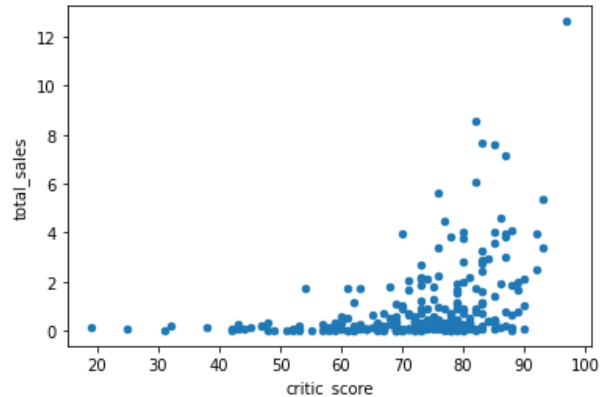 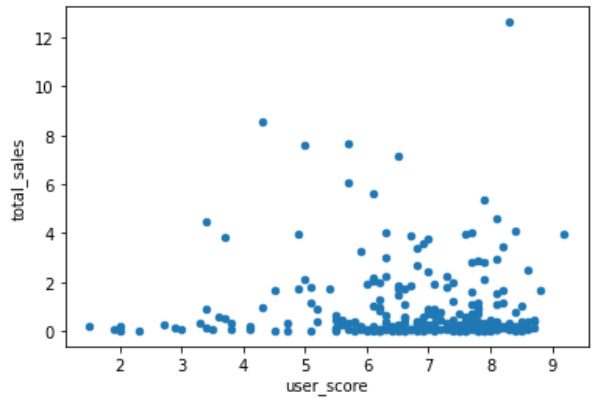

Коэффициент корреляции с оценками критиков 0,4 говорит о средней прямой связи с продажами. Их работа вносит определенный вклад.
Оценки пользователей вообще не влияют на продажи - коэффициент обратый: -0,03.
Одна из причин такого результата - критики оценивают игру на старте продаж, а  пользователи  - уже **купленную** игру. 
Критик в какой-то мере является рекламным инструментом, а у пользователя есть ожидания и реальность, и они не всегда сходятся.

На **других платформах** ситуация по моему должна быть похожей, т.к. многие игры представлены на нескольких платформах. Разработка, выпуск, реклама, распространение идут примерно одинаково. Конфета та же, обертка другая.


**О Жанрах**
По игровым жанрам есть явная группа лидеров - Action, Shooter, RPG и Sports c общей долей 77%. Остальные жанры имеют кратное отставание даже от 3-4 места.


**Как различаются рынки разных стран?**
Анализ показал, что в Европеи и Америки примерно похожи игровые предпочтенния как по жанрам, так и по консолям. Существенная разница только одна - в Европе любят PlayStation, в Америке - XBox.

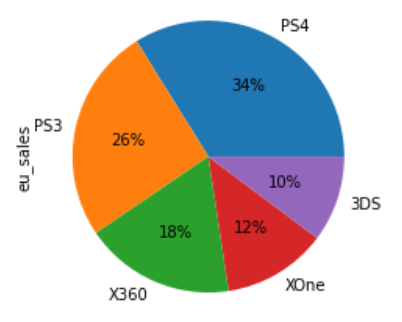
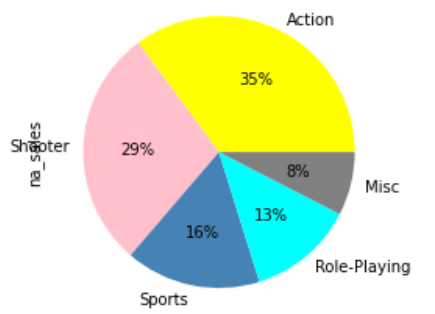

Япония - другой мир во всем. Другие платформы с акцентом на портативность, и, соответственно, другие игры.

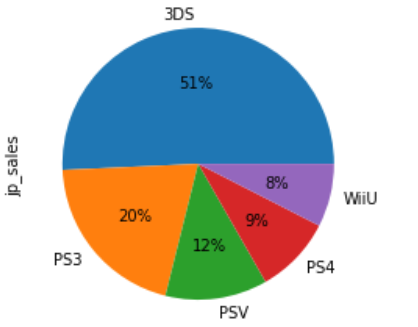
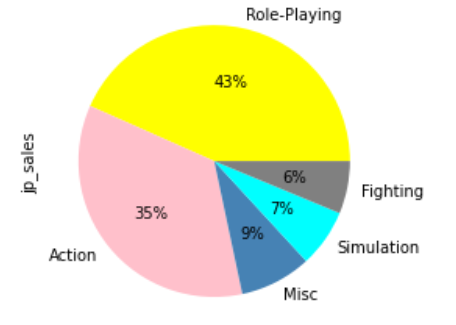

Анализ рейтинга ESRB так же показал похожесть рынков Америки и Европы и абсолютно противоположную картину в Японии.


Судя по полученным данным, в Японии не любят ESRB-маркировку. В тоже время в Японии есть своя система маркировки видеоигр.
Вполне вероятно, что пропуски во рейтингах многих игр были связаны именно с этим. Там, где есть оценка, видны аномально низкие продажи по сравнению с Европой и Америкой, но, там, где нет оценки - Япония даже впереди.

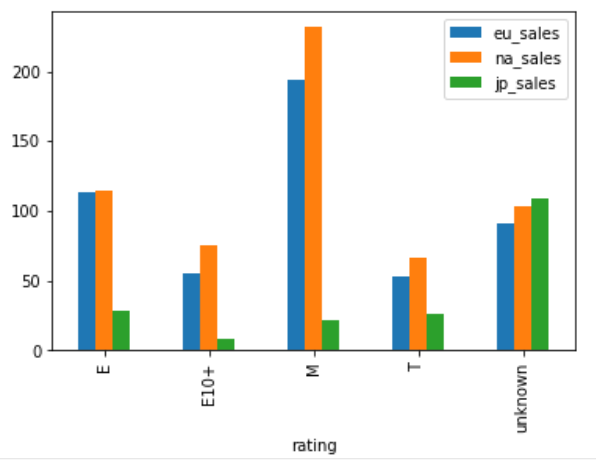

Корректно было бы анализировать рейтинг, работающий во всех странах или учитывающий разные рейтинги в одном. И в идеале без пропусков данных.


И в заключении были проверены статистически две гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One = рейтингам (user_score) платформ PC
H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One ≠ рейтингам (user_score) платформ PC

Результат:

p-значение: 4.935072360183574e-06

Отвергаем нулевую гипотезу

Рейтинги различаются.


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H_0: Средние пользовательские рейтинги (user_score) жанра Action  = рейтингам (user_score) жанра Sports
H_a: Средние пользовательские рейтинги (user_score) жанра Action  ≠ рейтингам (user_score) жанра Sports

Результат:
p-значение: 0.07370217419278526

Не получилось отвергнуть нулевую гипотезу

Средние пользовательские  рейтинги жанров все же близки.